

#  depending on your machine, results of time will be different!
# if you run the following code on your own computer, and then run it using VSS. You will get the same estimation of errors, but different timing


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

def midpt_int(func,a,b,n):
    delta_x = (b - a)/n
    mid_x   = np.arange(a,b,delta_x) +  delta_x/2
    estimate= delta_x*np.sum(func(mid_x))
    return estimate

a = 2.
b = 3.
N = 10000


In [3]:
# just to store 1,2,3,...N
Na = np.arange(1,N+1)

# calculate exact value
exactval=intf(b)-intf(a)


# create vectors to store MC & midpoint estimation results
Imc = np.zeros(N)
Imp = np.zeros(N)

# create vectors to store MC & midpoint time
Tmc = np.zeros(N)
Tmp = np.zeros(N)


# for each N run estimations
for K in range(N):
    
    t0 = time.time()
    X  = np.random.uniform(low=a, high=b, size=K+1)
    Y  = f(X)
    Imc[K] = (b-a) * np.sum(Y)/ (K+1)
    t1 = time.time()

    Imp[K] = midpt_int(f,a,b,K+1)
    t2 = time.time()
    Tmc[K] = t1 - t0
    Tmp[K] = t2 - t1

Ermc = np.abs(Imc - exactval)
Ermp = np.abs(Imp - exactval)



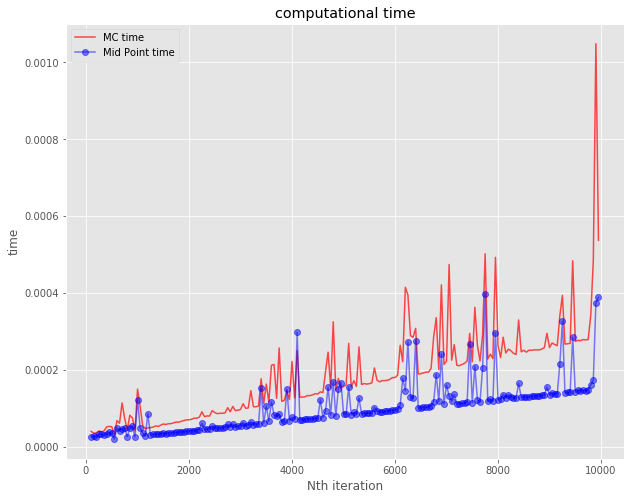

In [4]:
select = np.arange(100,N,50)

plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot(Na[select],Tmc[select], '-',c='red', alpha=0.7,label = "MC time")
plt.plot(Na[select],Tmp[select], '-o',c='blue', alpha=0.5,label = "Mid Point time")
plt.xlabel("Nth iteration")
plt.ylabel("time")
plt.title('computational time')
plt.legend()
# 
plt.show()

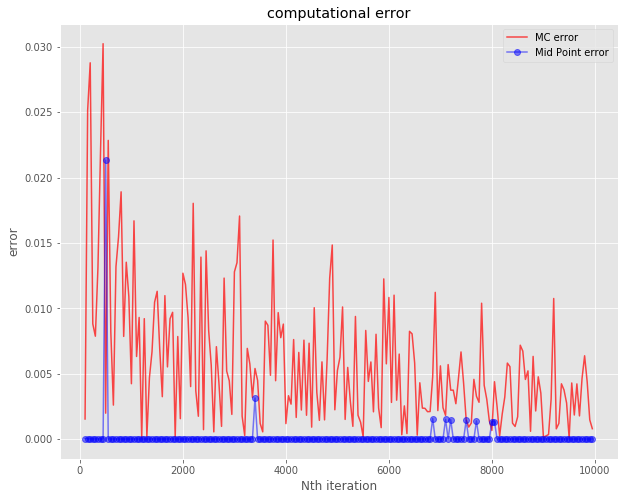

In [35]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot(Na[select],Ermc[select], '-',c='red', alpha=0.7,label = "MC error")
plt.plot(Na[select],Ermp[select], '-o',c='blue', alpha=0.5,label = "Mid Point error")
plt.xlabel("Nth iteration")
plt.ylabel("error")
plt.title('computational error')
plt.legend()
# 
plt.show()

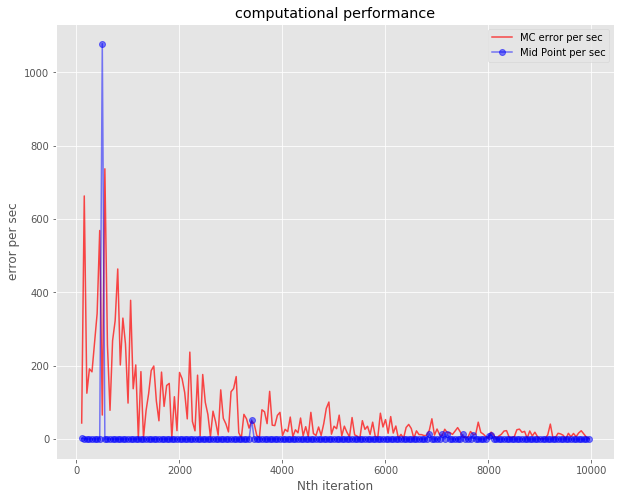

In [36]:
# porformance in general
Er_t_mc = Ermc /Tmc 
Er_t_mp = Ermp /Tmp

plt.figure(figsize=(10,8))
plt.style.use('ggplot')
plt.plot(Na[select],Er_t_mc[select], '-',c='red', alpha=0.7,label = "MC error per sec")
plt.plot(Na[select],Er_t_mp[select], '-o',c='blue', alpha=0.5,label = "Mid Point per sec")
plt.xlabel("Nth iteration")
plt.ylabel("error per sec")
plt.title('computational performance')
plt.legend()
# 
plt.show()